<a href="https://colab.research.google.com/github/Mayan-Ryan/ECG-Arrythmia/blob/main/SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SVM Model

In [ ]:
import tensorflow as tf
import seaborn as sns
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

In [83]:
X_train_svm,X_test_svm,y_train_svm, y_test_svm = train_test_split(X,y, test_size=0.2)

In [ ]:
classifier = SVC(kernel='linear')
classifier.fit(X_train_svm, y_train_svm)
y_pred_svm = classifier.predict(X_test_svm)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_svm, y_pred_svm))
print("Recall Score:",metrics.recall_score(y_test_svm,y_pred_svm, average='macro'))
print("Precision:",metrics.precision_score(y_test_svm,y_pred_svm,average='macro'))
print("F1 Score:",metrics.f1_score(y_test_svm,y_pred_svm,average='macro'))

Accuracy: 1.0
Recall Score: 1.0
Precision: 1.0
F1 Score: 1.0


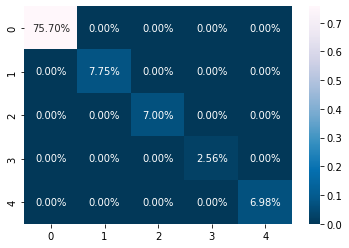

In [ ]:
cm = confusion_matrix(y_test_svm, y_pred_svm)
sns.heatmap(cm/np.sum(cm), annot=True,fmt='.2%', cmap='PuBu_r')
plt.savefig('Confusion_matrix.png')

## Logistic Regression Model

In [ ]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
# Identify features using Recursive Feature Elimination(RFE)
X_train_df= pd.DataFrame(X_train)
y_train_df= pd.DataFrame(y_train)
logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg, step= 20)
rfe = rfe.fit(X_train_df, y_train_df.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True False  True  True  True False
  True  True  True False False  True  True  True  True  True  True False
  True  True False False False  True  True False False  True  True False
  True False  True  True False False  True False False  True False False
 False False  True  True False  True False  True False  True  True False
  True  True  True False False  True False  True  True  True  True  True
 False False  True  True  True  True  True False  True  True False False
  True  True False  True  True  True  True  True  True False False False
  True False  True  True False  True False False False  True False  True
 False False False  True  True  True  True  True  True  True  True  True
 False  True False  True False False  True False False False False  True
 False  True False False False  True False  True False False False  True
  True False  True False  True False False False False False False False
 False  True  True False  True False False  True Fa

In [ ]:
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X_train_df, y_train_df, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_LR, y_train_LR)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred_LR = logreg.predict(X_test_LR)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_LR, y_test_LR)))

Accuracy of logistic regression classifier on test set: 1.00


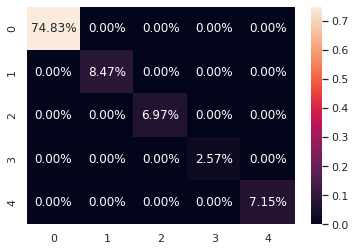

In [ ]:
cm = confusion_matrix(y_test_LR, y_pred_LR)
sns.heatmap(cm/np.sum(cm), annot=True,fmt='.2%')
plt.savefig('Confusion_matrix.png')

In [ ]:
print(classification_report(y_test_LR, y_pred_LR))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17962
           1       1.00      1.00      1.00      2034
           2       1.00      1.00      1.00      1674
           3       1.00      1.00      1.00       616
           4       1.00      1.00      1.00      1717

    accuracy                           1.00     24003
   macro avg       1.00      1.00      1.00     24003
weighted avg       1.00      1.00      1.00     24003



## CNN Model

In [75]:
import keras
from keras.models import Sequential
from keras.layers import Conv1D, AvgPool1D, Flatten, Dense, Dropout, Softmax
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.optimizers import Adam 
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras import regularizers

In [ ]:
train, test = train_test_split(X_dataFrame, test_size=0.20)

In [ ]:
X_train_CNN = train.iloc[:,:train.shape[1]-1].values
X_test_CNN = test.iloc[:,:test.shape[1]-1].values
X_train_CNN = X_train_CNN.reshape(len(X_train_CNN), X_train_CNN.shape[1],1)
X_test_CNN = X_test_CNN.reshape(len(X_test_CNN), X_test_CNN.shape[1],1)

In [70]:
z1=train[train.shape[1]-1]
z2=test[test.shape[1]-1]
y_train_CNN=to_categorical(z1)
y_test_CNN=to_categorical(z2)

In [71]:
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=13, padding='same', activation='relu',input_shape=(360, 1)))
model.add(AvgPool1D(pool_size=3, strides=2))
model.add(Conv1D(filters=32, kernel_size=15, padding='same', activation='relu'))
model.add(AvgPool1D(pool_size=3, strides=2))
model.add(Conv1D(filters=64, kernel_size=17, padding='same', activation='relu'))
model.add(AvgPool1D(pool_size=3, strides=2))
model.add(Conv1D(filters=128, kernel_size=19, padding='same', activation='relu'))
model.add(AvgPool1D(pool_size=3, strides=2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(35,kernel_regularizer=regularizers.l2(0.0001), bias_regularizer=regularizers.l2(0.0001)))
model.add(Dense(5,kernel_regularizer=regularizers.l2(0.0001), bias_regularizer=regularizers.l2(0.0001)))
model.add(Softmax())

In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 360, 16)           224       
                                                                 
 average_pooling1d (AverageP  (None, 179, 16)          0         
 ooling1D)                                                       
                                                                 
 conv1d_1 (Conv1D)           (None, 179, 32)           7712      
                                                                 
 average_pooling1d_1 (Averag  (None, 89, 32)           0         
 ePooling1D)                                                     
                                                                 
 conv1d_2 (Conv1D)           (None, 89, 64)            34880     
                                                                 
 average_pooling1d_2 (Averag  (None, 44, 64)           0

In [77]:
callbacks = [
            EarlyStopping(verbose=1),
            ReduceLROnPlateau(factor = 0.5, patience = 3, min_lr = 0.01, verbose=1),
            TensorBoard( log_dir='./logs', histogram_freq=0, write_graph = True, write_grads=False, write_images=True),
            ModelCheckpoint('models/{}-latest.hdf5', monitor='val_loss', save_best_only=False, verbose=1, period=10)
            # , lr_decay_callback 
             ]
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(X_train_CNN, y_train_CNN, batch_size=36, epochs=60, verbose=1, validation_data=(X_test_CNN, y_test_CNN), callbacks=callbacks)

Epoch 1/60
2223/2223 [==============================] - 209s 93ms/step - loss: 0.9039 - accuracy: 0.7494 - val_loss: 0.8916 - val_accuracy: 0.7516 - lr: 0.0010
Epoch 2/60
2223/2223 [==============================] - 200s 90ms/step - loss: 0.8977 - accuracy: 0.7496 - val_loss: 0.8902 - val_accuracy: 0.7516 - lr: 0.0010
Epoch 2: early stopping


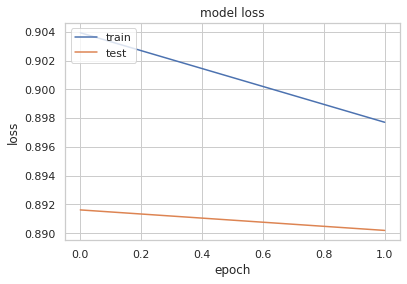

In [79]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

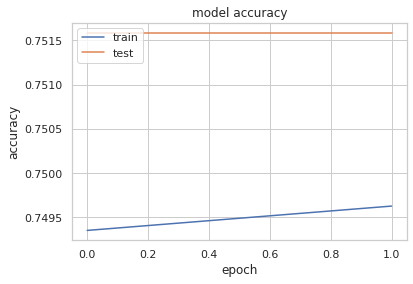

In [80]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [81]:
score = model.evaluate(X_test_CNN, y_test_CNN)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

626/626 [==============================] - 12s 19ms/step - loss: 0.8902 - accuracy: 0.7516
Test Loss: 0.8901904821395874
Test accuracy: 0.7515872716903687


## SMOTE

In [84]:
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_svm, y_train_svm)

In [ ]:
# We will use SMOTE for the SVM classifier as it obtained the highest accuracy
classifier = SVC(kernel='linear')
classifier.fit(X_res, y_res)
y_pred_smote = classifier.predict(X_test_svm)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_svm,y_pred_smote)
sns.heatmap(cm/np.sum(cm), annot=True,fmt='.2%', cmap='seagreen')
plt.savefig('Confusion_matrix_smote.png')

## SMOTE USING ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN
oversample = ADASYN()
X_ada, y_ada = oversample.fit_resample(X_train_svm, y_train_svm)

In [ ]:
classifier = SVC(kernel='linear')
classifier.fit(X_ada, y_ada)
y_pred_smote = classifier.predict(X_test_svm)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_svm,y_pred_smote)
sns.heatmap(cm/np.sum(cm), annot=True,fmt='.2%', cmap='PuBu_r')
plt.savefig('Confusion_matrix_smote.png')